# Drawing the multipanel barplot for tx35: all AR6 land regions

In [1]:
ensembles = c('CORDEX','CMIP5', 'CMIP6')
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

data = list()
for (ensemble in ensembles){
    data[[ensemble]] = list()
    for (GWL in GWLs){
        data[[ensemble]][[GWL]] = list()
    }
    for (scenario in scenarios){
        data[[ensemble]][[scenario]] = list()
    }

}

## 1. Get the data from the json files

In [2]:
library(rjson)

Warning message:
“package ‘rjson’ was built under R version 3.6.3”


In [ ]:
CWD = getwd()

In [3]:
# -- CMIP6
ensemble = 'CMIP6'
json_file = paste(CWD,'/../../data/Figure_S12.1/',ensemble,'_tx35isimip_AR6_regional_averages.json',sep='')

json_data <- fromJSON(paste(readLines(json_file), collapse=""))
AR6_regions = names(json_data[['1.5']])

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/tx35_satellites/CMIP6_tx35isimip_AR6_regional_averages.json'”


In [4]:
AR6_regions

[1] "ARP"  "CAF"  "CAR"  "CAU"  "CNA"  "EAN"  "EAS"  "EAU"  "ECA"  "EEU" 
[11] "ENA"  "ESAF" "ESB"  "GIC"  "MDG"  "MED"  "NAU"  "NCA"  "NEAF" "NEN" 
[21] "NES"  "NEU"  "NSA"  "NWN"  "NWS"  "NZ"   "RAR"  "RFE"  "SAH"  "SAM" 
[31] "SAS"  "SAU"  "SCA"  "SEA"  "SEAF" "SES"  "SSA"  "SWS"  "TIB"  "WAF" 
[41] "WAN"  "WCA"  "WCE"  "WNA"  "WSAF" "WSB"

### Prepare R list with all the regions => Get the regions list from the CMIP6 json file, for GWL 1.5K

In [5]:
all_regions = list()
GWLs = c('1.5','2','4')
scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')

for (region_name in AR6_regions){
    all_regions[[region_name]] = list()
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        all_regions[[region_name]][[ensemble]] = list()
        for (GWL in GWLs){
            all_regions[[region_name]][[ensemble]][[GWL]] = list()
        }#end for GWL
        for (scenario in scenarios){
            all_regions[[region_name]][[ensemble]][[scenario]] = list()
        }#end for scenario
    }#end for ensemble
}#end for region_name

In [6]:
ensemble = 'CMIP6'
json_file = paste(CWD,'/../../data/Figure_S12.1/',ensemble,'_tx35isimip_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='ssp585_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='ssp585_far'){ wclim_period='8.5_late' }
    if (clim_period=='ssp126_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='ssp126_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        print(json_data[[clim_period]][[region_name]])
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/tx35_satellites/CMIP6_tx35isimip_AR6_regional_averages.json'”


[1] "1.5"
[1] 128.2824 136.1841 141.9393
[1] 65.87801 80.93858 91.20133
[1] 13.88435 27.06272 42.31551
[1] 126.1779 130.8283 139.2657
[1] 38.27299 45.51490 49.09595
[1] 0 0 0
[1]  6.97866 10.66254 14.59569
[1] 44.42820 55.76960 61.32381
[1] 13.21339 15.75832 20.48270
[1]  6.443461  8.758698 13.220369
[1] 12.75726 15.88952 21.27767
[1] 28.63350 40.34388 53.21347
[1] 0.8323187 1.4261866 2.4748320
[1] 0 0 0
[1] 1.455393 3.567393 6.070272
[1] 43.05756 47.77371 52.88762
[1] 150.6284 168.9887 182.1360
[1] 79.21703 87.40875 94.60707
[1] 125.2110 144.5640 152.8541
[1] 0.1650915 0.3283586 0.7005877
[1]  58.64440  74.58884 107.08057
[1] 0.009429381 0.041501623 0.146360460
[1]  46.27063  76.82283 115.40570
[1] 0.1268553 0.2326270 0.4278342
[1] 39.63298 48.73462 60.24282
[1] 0.000000000 0.000000000 0.001820803
[1] 0.07376342 0.16129832 0.45099639
[1] 0.1158317 0.2234822 0.4048011
[1] 193.5848 199.5898 202.7807
[1]  99.92813 122.94788 149.09476
[1]  98.13888 106.00641 111.84588
[1] 35.77296 38.2681

In [7]:
names(json_data)

[1] "1.5"        "2"          "3"          "4"          "baseline"  
[6] "ssp126_far" "ssp126_mid" "ssp585_far" "ssp585_mid"

In [8]:
ensemble = 'CMIP5'
json_file = paste(CWD,'/../../data/Figure_S12.1/',ensemble,'_tx35isimip_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='rcp85_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='rcp85_far'){ wclim_period='8.5_late' }
    if (clim_period=='rcp26_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='rcp26_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        print(json_data[[clim_period]][[region_name]])
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/tx35_satellites/CMIP5_tx35isimip_AR6_regional_averages.json'”


[1] "1.5"
[1] 125.5594 133.9294 138.4925
[1] 74.61816 84.90263 97.90252
[1]  1.825347  4.596816 10.274356
[1] 124.0460 133.1559 141.1673
[1] 33.26702 41.42327 50.50996
[1] 0 0 0
[1]  5.942025  8.441993 10.433341
[1] 43.30357 49.75867 57.04035
[1] 10.05333 12.17819 13.99385
[1]  4.254503  7.079157 10.637948
[1] 10.53871 15.15445 19.78567
[1] 21.37298 37.72821 44.37478
[1] 0.3203091 0.4409990 0.9202287
[1] 0 0 0
[1] 0.7800537 1.2798997 6.4238906
[1] 34.79697 37.17200 39.97730
[1] 148.0307 160.7673 173.2685
[1] 71.45926 78.34399 87.36017
[1] 123.4814 144.1650 148.6006
[1] 0.08572923 0.23448356 0.47553480
[1] 47.99750 75.51601 88.27504
[1] 0.003881946 0.022002861 0.140074842
[1] 65.47277 80.32759 95.77451
[1] 0.1063839 0.3010570 0.4104938
[1] 37.17820 44.52774 48.66535
[1] 0 0 0
[1] 0.03451052 0.09517747 0.22478047
[1] 0.03109505 0.05121085 0.27624723
[1] 196.1938 202.4389 204.8529
[1]  92.43406 121.45380 139.51871
[1] 100.8886 105.9999 113.6290
[1] 34.54823 37.87728 39.90736
[1] 32.13169 

In [9]:
ensemble = 'CORDEX'
json_file = paste(CWD,'/../../data/Figure_S12.1/',ensemble,'_tx35isimip_AR6_regional_averages.json',sep='')
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

for (clim_period in names(json_data)){
    if (clim_period=='baseline'){ wclim_period='modern' }
    if (clim_period=='rcp85_mid'){ wclim_period='8.5_mid' }
    if (clim_period=='rcp85_far'){ wclim_period='8.5_late' }
    if (clim_period=='rcp26_mid'){ wclim_period='2.6_mid' }
    if (clim_period=='rcp26_far'){ wclim_period='2.6_late' }
    if (clim_period=='1.5'){ wclim_period='1.5' }
    if (clim_period=='2'){ wclim_period='2' }
    if (clim_period=='3'){ wclim_period='3' }
    if (clim_period=='4'){ wclim_period='4' }
    print(wclim_period)
    for (region_name in names(json_data[[clim_period]])){
        all_regions[[region_name]][[ensemble]][[wclim_period]][['vals']] = json_data[[clim_period]][[region_name]]
        print(json_data[[clim_period]][[region_name]])
    }
}

Warning message in readLines(json_file):
“ligne finale incomplète trouvée dans '/home/jservon/Chapter12_IPCC/data/Figure_S12.1/CORDEX_tx35isimip_AR6_regional_averages.json'”


[1] "1.5"
[1] 129.2689 135.3646 140.7770
[1]  84.61691  96.77580 104.02628
[1] 14.96420 26.96393 29.34848
[1] 116.0898 119.3522 126.2360
[1] -99999 -99999 -99999
[1] -99999 -99999 -99999
[1] 40.23530 44.01575 46.63116
[1] -99999 -99999 -99999
[1] -99999 -99999 -99999
[1] 32.02525 39.68628 44.82029
[1] 3.067160 4.908032 5.936900
[1] 40.50889 42.63447 45.84397
[1] 147.5532 154.4159 168.4012
[1] -99999 -99999 -99999
[1] 141.2743 156.5697 165.6920
[1] -99999 -99999 -99999
[1] 81.65366 82.57582 98.10506
[1] 0.002094287 0.015199988 0.082239774
[1] 59.38800 84.50409 98.42717
[1] -99999 -99999 -99999
[1] 47.45537 69.83265 79.21839
[1] 0.0000000000 0.0000000000 0.0006503459
[1] 191.7505 198.7513 202.1711
[1] 123.1377 131.4058 145.1928
[1] 104.4881 113.3360 120.4738
[1] 28.91419 31.26462 32.04637
[1] 53.95695 59.05702 68.30274
[1] -99999 -99999 -99999
[1] 30.06822 37.71595 39.70632
[1] 34.77409 42.32990 44.77072
[1] 1.696986 2.570195 2.886897
[1] 0.2307649 0.4514230 0.5361113
[1] -99999 -99999 -

In [10]:
names(json_data)

[1] "1.5"       "2"         "3"         "4"         "baseline"  "rcp26_far"
[7] "rcp26_mid" "rcp85_far" "rcp85_mid"

In [11]:
for (region_name in AR6_regions){
    ensemble = 'CMIP6'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'black'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue4'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'red'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid4'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'darkorange'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'tan4'

    ensemble = 'CMIP5'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey40'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue3'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightcoral'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'darkorchid3'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'sandybrown'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff4'

    ensemble = 'CORDEX'
    all_regions[[region_name]][[ensemble]][['modern']][['color']] = 'grey60'
    all_regions[[region_name]][[ensemble]][['2.6_mid']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_mid']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['2.6_late']][['color']] = 'dodgerblue'
    all_regions[[region_name]][[ensemble]][['8.5_late']][['color']] = 'lightpink'
    all_regions[[region_name]][[ensemble]][['1.5']][['color']] = 'mediumpurple1'
    all_regions[[region_name]][[ensemble]][['2']][['color']] = 'navajowhite2'
    all_regions[[region_name]][[ensemble]][['4']][['color']] = 'peachpuff3'
}#end for region_name

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"


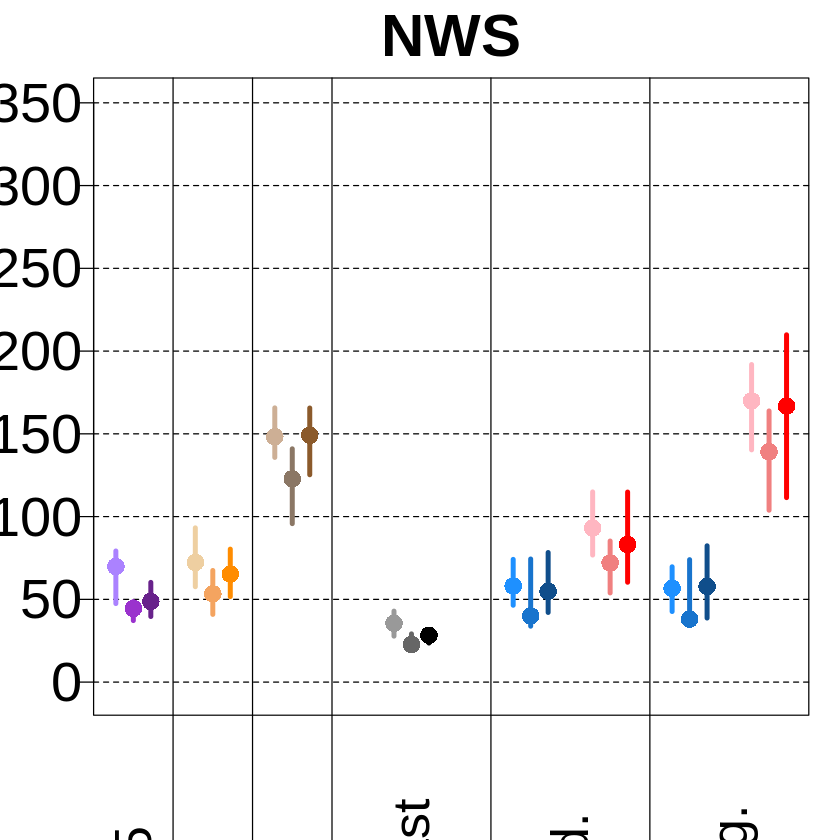

In [12]:
"barplot_satellite_chap12"=function(data, title, ylabel, do_xlab='TRUE', mar=c(4,3,2.5,1),
                                    do_ylab_left = 'TRUE', do_ylab_right = 'FALSE'){
    #
    # -- Names
    ensembles = c('CORDEX','CMIP5', 'CMIP6')
    GWLs = c('1.5','2','4')
    scenarios = c('modern', '2.6_mid', '8.5_mid', '2.6_late', '8.5_late')
    nhorizons = length(GWLs)+length(scenarios)
    
    # -- Y limits
    ylim=c(-20,365)
    
    # -- position on the x axis of the ensembles
    xpos = c(1,2,3, 4.5, 6, 7, 8, 9)
    xvert = c(1.5,2.5,3.5,5.5,7.5)
    inner_margin = 0.5
    xlim = c(1-inner_margin, max(xpos)+inner_margin)
    general_cex=1.3
    par(cex=general_cex)
    par(mar=mar)
    plot(1:nhorizons, rep(NA, nhorizons), col='white', ylim=ylim, xlim=xlim,
         xaxt='n', yaxt='n', xlab='', ylab='', xaxs="i", yaxs='i', font=2)
    mtext(ylabel, 2, font=2, line=2.2, cex=general_cex)
    #     cex.axis=1.2, cex.lab=1.5, font=2)
    par(xpd=NA)
    par(font=2)
    
    for (yval in seq(0,350,by=50)){
        lines(xlim,rep(yval,2),type='l', lty=2)
    }

    delta = 0.22 # - space between CMIP6/CMIP5/CORDEX
    # -- Plot data
    i = 1
    for (horizon in c(GWLs, scenarios)){
        j = xpos[i] - delta
        for (ensemble in ensembles){
            print(paste(horizon, ensemble))
            dat = data[[ensemble]][[horizon]][['vals']]
            if (is.null(dat)){dat = c(NA,NA,NA)}
            col = data[[ensemble]][[horizon]][['color']]
            lines(rep(j,2), c(dat[1],dat[3]), type='l', col=col, lwd=4)
            points(j, dat[2], cex=1.5, pch=16, col=col)
            j = j + delta
        }
        i = i + 1
    }
    
    # -- Y axis
    yvals = seq(0,350,by=50)
    dumyvals = yvals
    ylabels = yvals
    
    # -- Y axis left
    ylabels = yvals
    par(cex=2.8)
    axis(2, at=dumyvals, labels=rep('',length(yvals)))
    if (do_ylab_left=='TRUE'){
        axis(2, pos=0.75, at=dumyvals, tick='FALSE', labels=ylabels, las=1)
    }
    # -- Y axis right
    if (do_ylab_right=='TRUE'){
        axis(4, pos=xlim[2]-0.25, at=dumyvals, labels=ylabels, las=1, tick='FALSE')
    }
    par(cex=general_cex)
    
    # -- X axis
    if (do_xlab=='FALSE'){
        axis(1, at=xvert, labels=rep('',length(xvert)))
    }
    # -- Title
    mtext(title,3, font=2, cex=3, line=0.5)

    # -- Vertical lines
    vline = ylim
    vline[1] = ylim[1] - (ylim[2]-ylim[1])*0.35
    if (do_xlab=='TRUE'){
        for (v in xvert){lines(c(v,v),vline,type='l', lwd=1)}
    }else{
        for (v in xvert){lines(c(v,v),ylim,type='l')}
    }
    
    if (do_xlab=='TRUE'){
        cex_text = 2
        bline = ylim[1] - 0.45*(ylim[2]-ylim[1])
        #btext2 = ylim[1] - 0.33*(ylim[2]-ylim[1])
        #
        # -- Labels GWLs
        GWLs_range = c(0.5,3.2)
        btext = ylim[1] - 0.58*(ylim[2]-ylim[1])
        lines(c(0.5,3.2), c(bline*0.9,bline*0.9), type='l', lwd=3)
        text(mean(GWLs_range),btext,expression("GWL"), font=1, adj=c(0.5,0), cex=cex_text*0.9)

        btext2 = ylim[1] - 0.23*(ylim[2]-ylim[1])
        adj_ts = c(0.5,0.5)
        adj_gwl = c(0.5,0.5)
        text(1,btext2,"1.5", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(2,btext2,"2", cex=cex_text, font=1, srt=90, adj=adj_gwl)
        text(3,btext2,"4", cex=cex_text, font=1, srt=90, adj=adj_gwl)

        # -- Labels time slices = modern, mid-term, long-term
        xmodern = 4.5
        xmid = 6.5
        xlate = 8.5
        text(xmodern,btext2, "r.past", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xmid,btext2, "mid.", font=1, cex=cex_text, srt=90, adj=adj_ts)
        text(xlate,btext2, "long.", font=1, cex=cex_text, srt=90, adj=adj_ts)

        time_slices = c(3.6,9.3)
        lines(time_slices, c(bline,bline), type='l', lwd=3)
        text(mean(time_slices),btext,"Time slices", font=1, adj=c(0.5,0), cex=cex_text*0.9)
    }#end if do_ylab
    
    
}

#barplot_satellite_chap12(data,"(a) IPCC Region of interest",'Whatever variable (unit)')
barplot_satellite_chap12(all_regions[['NWS']],'NWS', '')

In [16]:

"draw_legend_box_hor"=function(data, mar=c(0,0,3,0)){

    par(mar=mar)
    plot(0:1,0:1,col='white',xaxt='n',yaxt='n', xlab='', ylab='', bty='n')
    text(-0.02,0.85, "Legend", font=2, cex=3, adj=0)
    linewidth = 0.07
    lwd=22
    #xcol1 = 0.25
    #ycol1 = 0.6
    xcol1 = 0.2
    ycol1 = 0.45
    space_between_cols = linewidth*1.4
    space_between_lines = 0.2
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    cex_text = 2.1
    cex_title = 2.3
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        text(xensemble, ycol, ensemble, font=1, cex=cex_text, adj=1)
        for (GWL in c('1.5','2','4')){
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[GWL]][['color']])
            if (ensemble=='CMIP6'){
                if (GWL=='1.5'){ tmplab = expression('+1.5'*degree*C) }
                if (GWL=='2'){ tmplab = expression('+2'*degree*C) }
                if (GWL=='4'){ tmplab = expression('+4'*degree*C) }
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=2, cex=cex_text)
                if (GWL=='1.5'){
                    #text(mean(c(xcol,xcol+linewidth)), ycol1+0.1, 'GWL', font=2, cex=1.5)
                    text(xcol, ycol1+space_between_lines*2.2, 'GWL', font=2, cex=cex_title, adj=0)
                }
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }

    xcol1 = 0.55
    ycol = ycol1
    xensemble = xcol1 - 0.05
    xensemble = xcol1 - 0.05
    for (ensemble in c('CMIP6','CMIP5','CORDEX')){
        xcol = xcol1
        for (time_slice in c('modern','2.6_late','8.5_late')){
            if (time_slice=='modern'){ tmplab = 'r.past' }
            if (time_slice=='2.6_late'){ tmplab = '2.6' }
            if (time_slice=='8.5_late'){ tmplab = '8.5' }
            lines(c(xcol,xcol+linewidth), c(ycol, ycol), type='l', lwd=lwd, col=data[[ensemble]][[time_slice]][['color']])
            if (ensemble=='CMIP6'){
                text(mean(c(xcol,xcol+linewidth)), ycol1+space_between_lines, tmplab, font=1, cex=cex_text)
            }
            if (time_slice=='modern'){
                #text(mean(c(xcol,xcol+linewidth)), ycol1+0.1, 'GWL', font=2, cex=1.5)
                text(xcol, ycol1+space_between_lines*2.2, 'RCPs/SSPs', font=2, cex=cex_title, adj=0)
            }
            xcol = xcol + space_between_cols
        }
        ycol = ycol - space_between_lines
    }
        ycol = ycol - space_between_lines
    
    yline = 0.5
    ypos = 0.45
    ylen = 0.3
    #xx = 0.75
    xx = 0.9
    lines(c(xx,xx),c(ypos-ylen,ypos+ylen), type='l', lwd=lwd/3, col='black')
    points(xx,ypos, pch=16, cex=2.6)
    text(xx+0.02,ypos+(ylen*1.1), expression(paste(90^th,"p")), font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos-(ylen*1.1), expression(paste(10^th,"p")), font=1, cex=cex_text,adj=0)
    text(xx+0.02,ypos, "median", font=1, cex=cex_text, adj=0)
    
}
#draw_legend_box_vert(data)

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

png 
  2

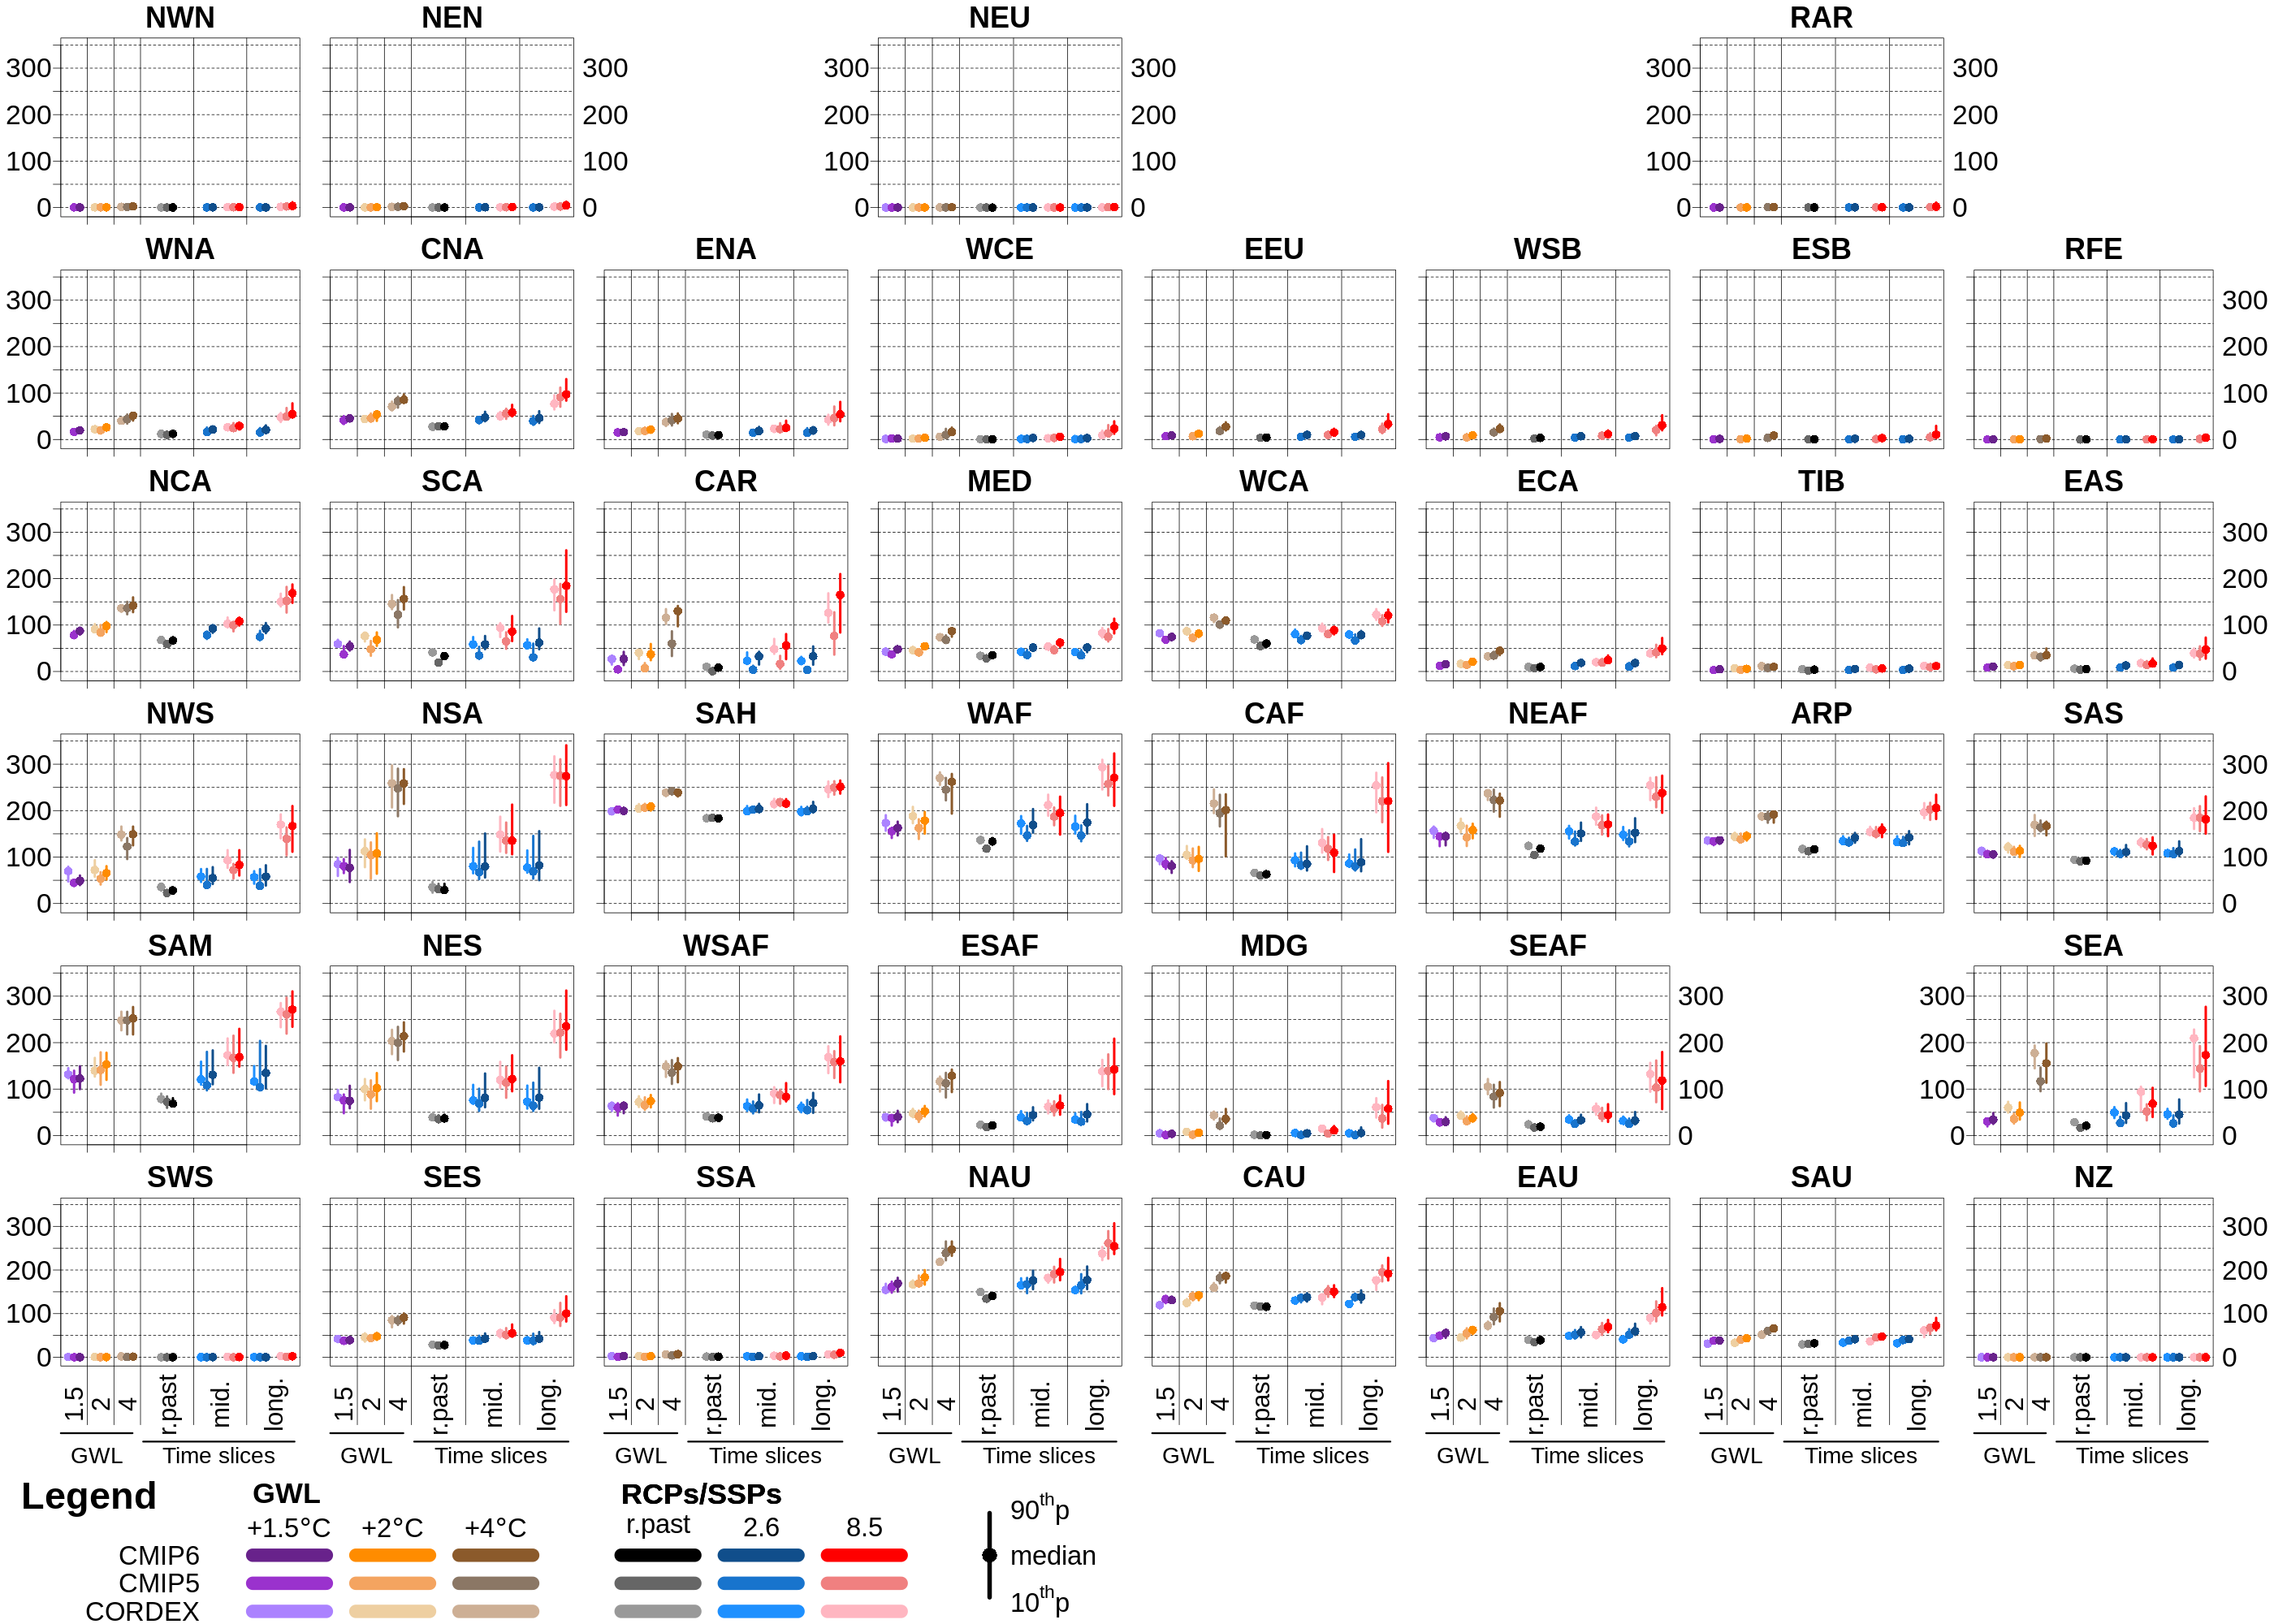

In [17]:
fsize = 2000
outfilename = paste(CWD,'/../../figs/Satellite_barplots/Figure_S12.1_tx35_satellite.png',sep='')
png(outfilename, width=fsize*1.4,height=fsize)

mat = rbind(
    c(1, 2, 0, 3, 0, 0, 4, 0),
    c(5, 6, 7, 8, 9, 10,11,12),
    c(13,14,15,16,17,18,19,20),
    c(21,22,23,24,25,26,27,28),
    c(29,30,31,32,33,34,0, 35),
    c(36,37,38,39,40,41,42,43),
    c(44, 44,44,44,0,0 ,0, 0 )
)

AR6_regions = c('NWN', 'NEN', 'NEU', 'RAR',
'WNA', 'CNA', 'ENA', 'WCE', 'EEU', 'WSB', 'ESB', 'RFE',
'NCA', 'SCA', 'CAR', 'MED', 'WCA', 'ECA', 'TIB', 'EAS',
'NWS', 'NSA', 'SAH', 'WAF', 'CAF', 'NEAF', 'ARP', 'SAS',
'SAM', 'NES', 'WSAF', 'ESAF', 'MDG', 'SEAF', 'SEA', 
'SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')

layout(mat,height=c(2,2,2,2,2,2.3,1.7),widths=c(1.15,1,1,1,1,1,1,1.15))


ylab = ''
for (i in 1:length(AR6_regions)){
    region_name = AR6_regions[i]
    plot_title = region_name
    do_ylab_left = 'FALSE'
    do_ylab_right = 'FALSE'
    mar=c(1,1,2.5,1)
    if (region_name %in% c('SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')){
        do_xlab = 'TRUE'
        mar[1]=4
    }else{
        do_xlab = 'FALSE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS','NEU','RAR','SEA')){
        do_ylab_left = 'TRUE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS')){
        mar[2]=4
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ','NEU','RAR','SEAF','NEN')){
        do_ylab_right = 'TRUE'
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ')){
        mar[2]=1
        mar[4]=4
    }
    
    barplot_satellite_chap12(all_regions[[region_name]],plot_title, ylab, mar=mar,
                            do_xlab=do_xlab, do_ylab_left = do_ylab_left, do_ylab_right=do_ylab_right)
}
draw_legend_box_hor(all_regions[[region_name]])
dev.off()

library("IRdisplay")
display_png(file=outfilename)  

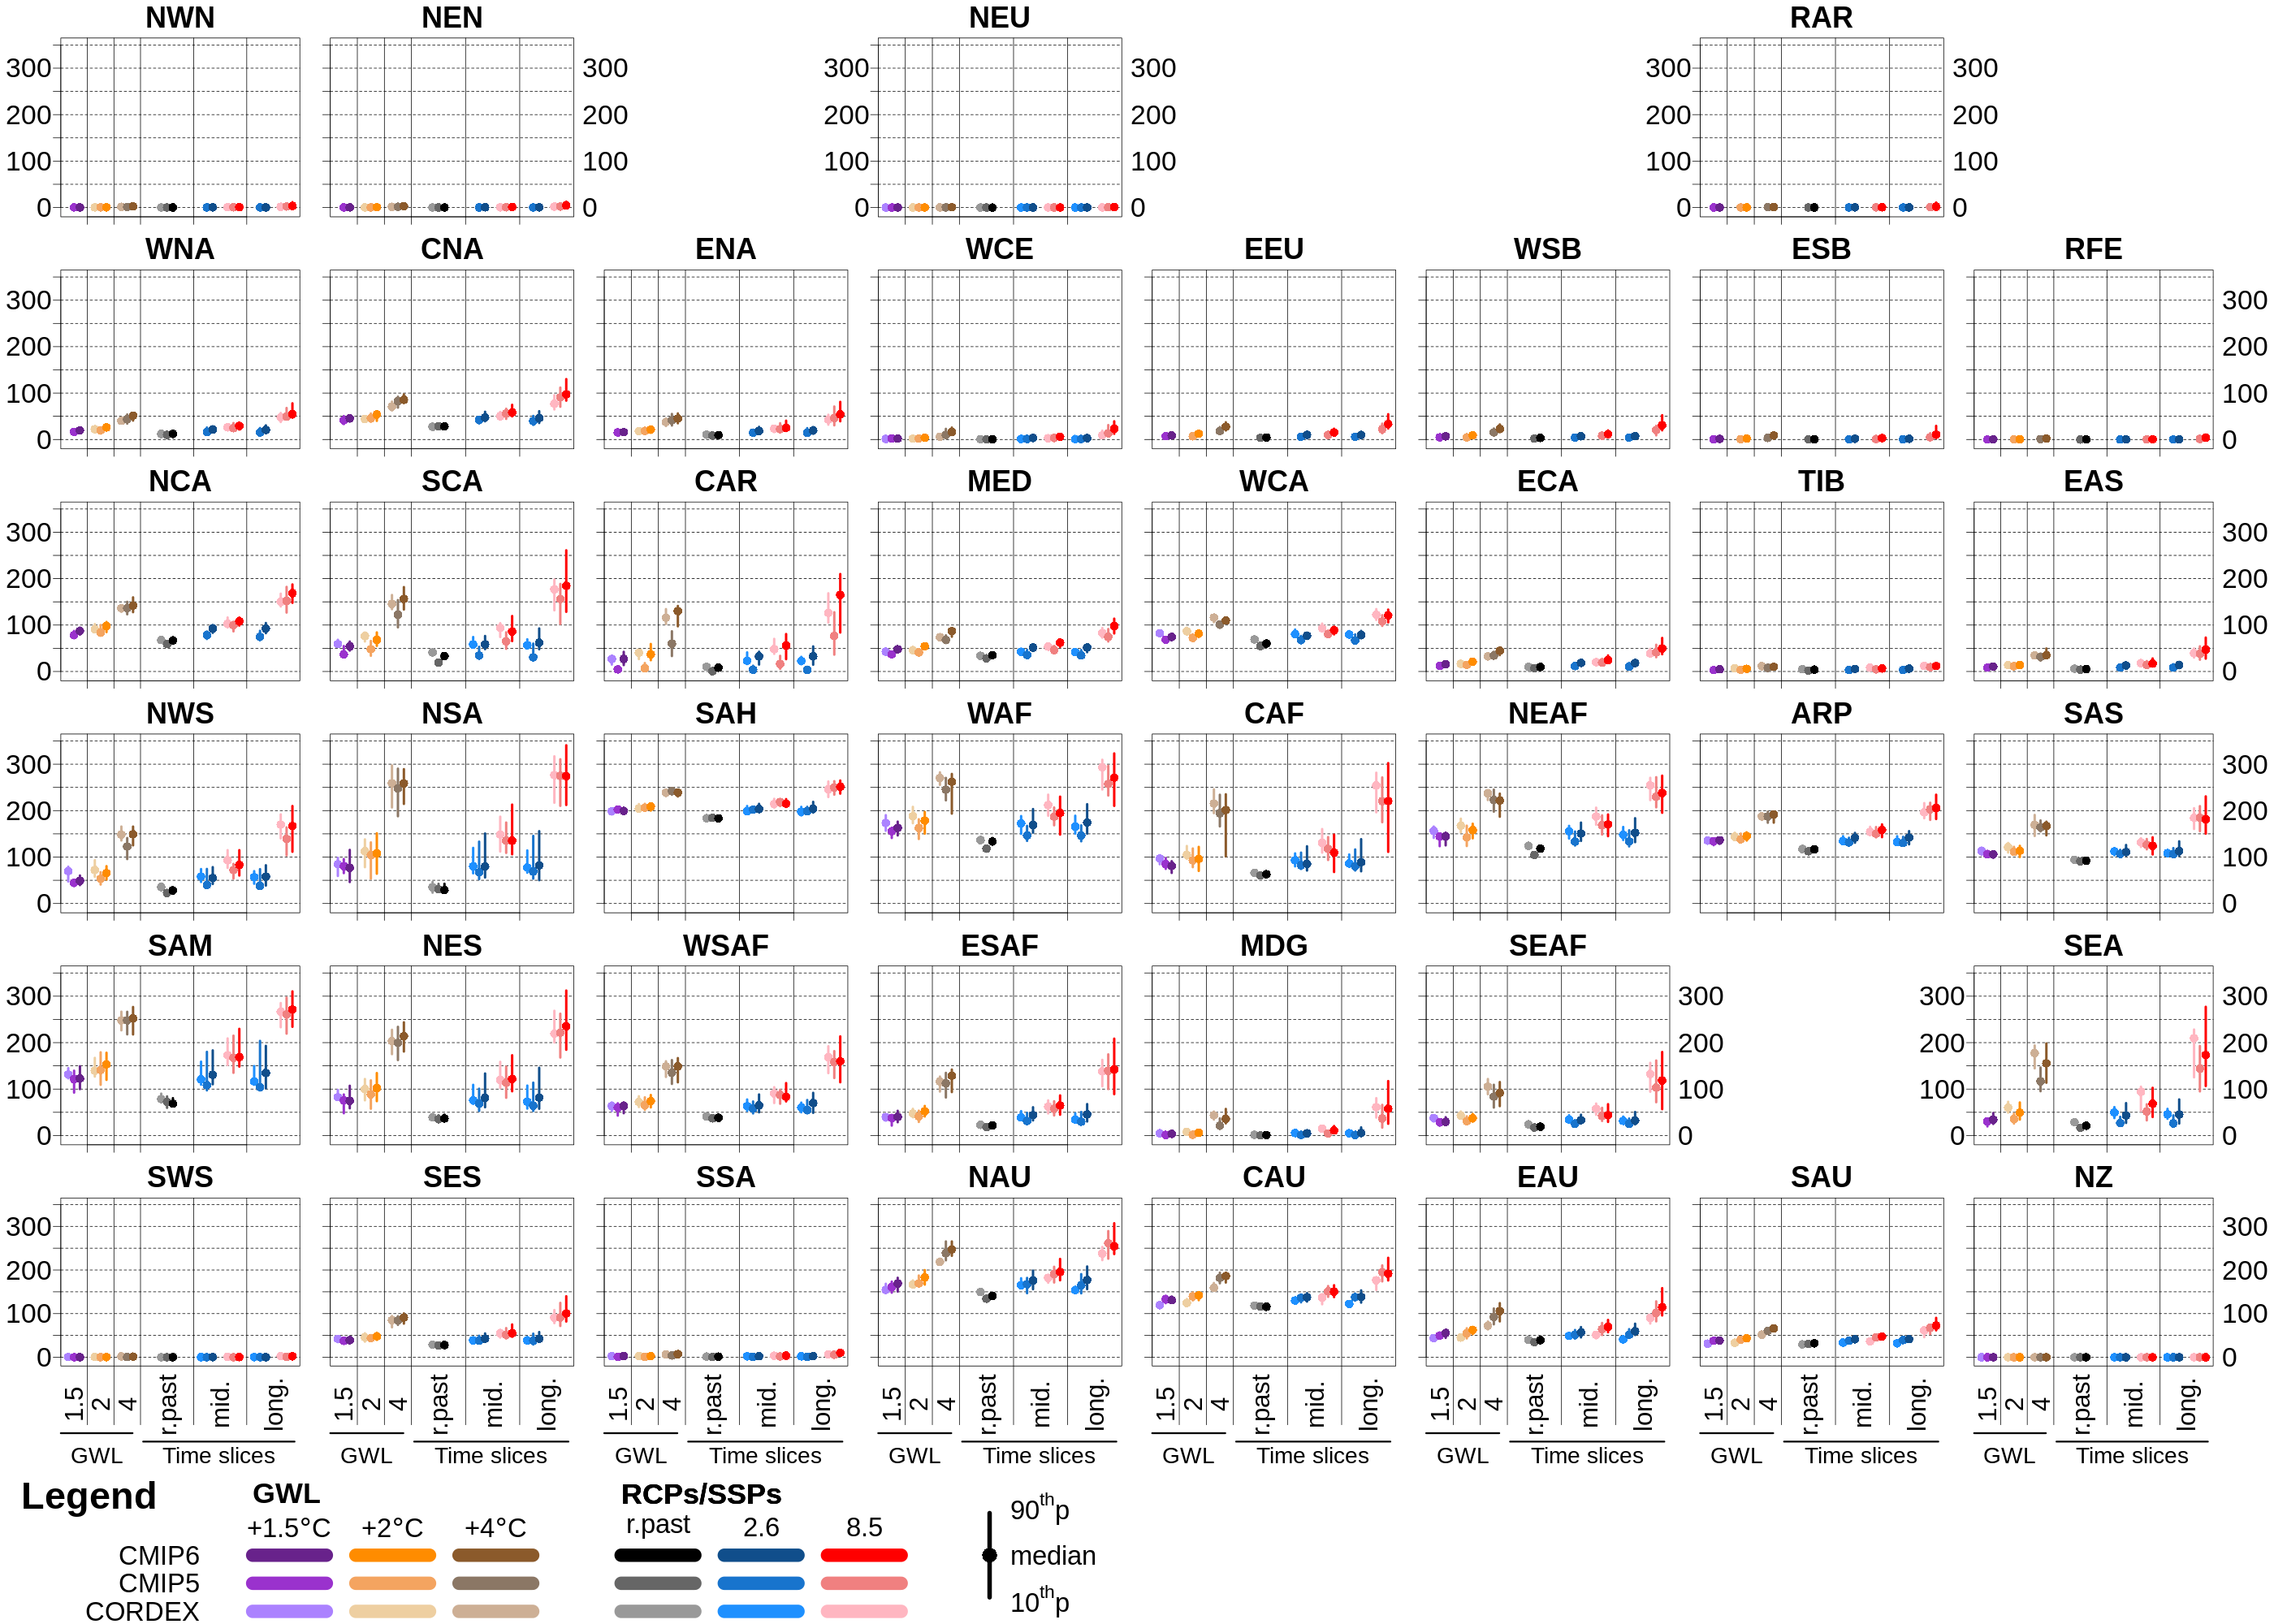

In [19]:
library("IRdisplay")
display_png(file=outfilename)  

## PDF

In [20]:
fsize = 20*1.4
outfilename = paste(CWD,'/../../figs/Satellite_barplots/Figure_S12.1_tx35_satellite.pdf',sep='')
pdf(outfilename, width=fsize*1.4,height=fsize)

mat = rbind(
    c(1, 2, 0, 3, 0, 0, 4, 0),
    c(5, 6, 7, 8, 9, 10,11,12),
    c(13,14,15,16,17,18,19,20),
    c(21,22,23,24,25,26,27,28),
    c(29,30,31,32,33,34,0, 35),
    c(36,37,38,39,40,41,42,43),
    c(44, 44,44,44,0,0 ,0, 0 )
)

AR6_regions = c('NWN', 'NEN', 'NEU', 'RAR',
'WNA', 'CNA', 'ENA', 'WCE', 'EEU', 'WSB', 'ESB', 'RFE',
'NCA', 'SCA', 'CAR', 'MED', 'WCA', 'ECA', 'TIB', 'EAS',
'NWS', 'NSA', 'SAH', 'WAF', 'CAF', 'NEAF', 'ARP', 'SAS',
'SAM', 'NES', 'WSAF', 'ESAF', 'MDG', 'SEAF', 'SEA', 
'SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')

layout(mat,height=c(2,2,2,2,2,2.3,1.7),widths=c(1.15,1,1,1,1,1,1,1.15))


ylab = 'Whatever variable (unit)'
ylab = ''
for (i in 1:length(AR6_regions)){
    region_name = AR6_regions[i]
    plot_title = region_name
    do_ylab_left = 'FALSE'
    do_ylab_right = 'FALSE'
    mar=c(1,1,2.5,1)
    if (region_name %in% c('SWS', 'SES', 'SSA', 'NAU', 'CAU', 'EAU', 'SAU', 'NZ')){
        do_xlab = 'TRUE'
        mar[1]=4
    }else{
        do_xlab = 'FALSE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS','NEU','RAR','SEA')){
        do_ylab_left = 'TRUE'
    }
    if (region_name %in% c('NWN','WNA','NCA','NWS','SAM','SWS')){
        mar[2]=4
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ','NEU','RAR','SEAF','NEN')){
        do_ylab_right = 'TRUE'
    }
    if (region_name %in% c('RFE','EAS','SAS','SEA','NZ')){
        mar[2]=1
        mar[4]=4
    }
    
    barplot_satellite_chap12(all_regions[[region_name]],plot_title, ylab, mar=mar,
                            do_xlab=do_xlab, do_ylab_left = do_ylab_left, do_ylab_right=do_ylab_right)
}
draw_legend_box_hor(all_regions[[region_name]])
dev.off()

library("IRdisplay")

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 CMIP5"
[1] "4 CMIP6"
[1] "modern CORDEX"
[1] "modern CMIP5"
[1] "modern CMIP6"
[1] "2.6_mid CORDEX"
[1] "2.6_mid CMIP5"
[1] "2.6_mid CMIP6"
[1] "8.5_mid CORDEX"
[1] "8.5_mid CMIP5"
[1] "8.5_mid CMIP6"
[1] "2.6_late CORDEX"
[1] "2.6_late CMIP5"
[1] "2.6_late CMIP6"
[1] "8.5_late CORDEX"
[1] "8.5_late CMIP5"
[1] "8.5_late CMIP6"
[1] "1.5 CORDEX"
[1] "1.5 CMIP5"
[1] "1.5 CMIP6"
[1] "2 CORDEX"
[1] "2 CMIP5"
[1] "2 CMIP6"
[1] "4 CORDEX"
[1] "4 

png 
  2